# Train OCR text Detector quick example

In [1]:
import os
import sys
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.TextDetectors.base import OCR

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
%matplotlib inline 

In [4]:
# auto download latest dataset
from NomeroffNet.tools import modelhub

# auto download latest dataset
info = modelhub.download_dataset_for_model("Ge")
PATH_TO_DATASET = info["dataset_path"]

# local path dataset
#PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "./data/dataset/OptionsDetector/numberplate_options_example")

In [5]:
PATH_TO_DATASET

'/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06'

In [6]:
DATASET_NAME = "ge"
VERSION = "2021_08_30_pytorch_lightning"

RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, 
                                 "models/", 
                                 'anpr_ocr_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [7]:
RESULT_MODEL_PATH

'/var/www/nomeroff-net24/models/anpr_ocr_ge_2021_08_30_pytorch_lightning.ckpt'

In [8]:
class ge(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I",
                        "J", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]


        # Train hyperparameters
        self.batch_size = 64
        self.epochs = 50
        self.gpus = 1

In [9]:
ocrTextDetector = ge()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False, num_workers=24)

GET ALPHABET
Max plate length in "val": 7
Max plate length in "train": 7
Max plate length in "test": 7
Letters train  {'T', 'C', 'J', 'K', 'S', 'P', 'Q', 'R', 'I', 'Z', '8', '9', '5', 'U', '3', '0', 'F', '6', 'E', 'A', 'L', 'X', 'G', '2', '1', 'V', 'M', 'B', 'N', 'D', 'Y', 'W', '7', 'H', '4'}
Letters val  {'T', 'C', 'J', 'K', 'S', 'P', 'Q', 'R', 'I', 'Z', '8', '9', '5', 'U', '3', '0', 'F', 'E', '6', 'A', 'L', 'X', 'G', '2', '1', 'V', 'B', 'N', 'M', 'D', 'Y', 'W', '7', 'H', '4'}
Letters test  {'T', 'C', 'J', 'K', 'P', 'S', 'Q', 'R', 'I', 'Z', '8', '9', '5', 'U', '3', '0', 'F', '6', 'E', 'A', 'L', 'X', 'G', '2', '1', 'M', 'B', 'N', 'V', 'Y', 'D', 'W', '7', 'H', '4'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


In [10]:
#ocrTextDetector.load(RESULT_MODEL_PATH)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.3 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt


Found lr: 0.5011872336272719



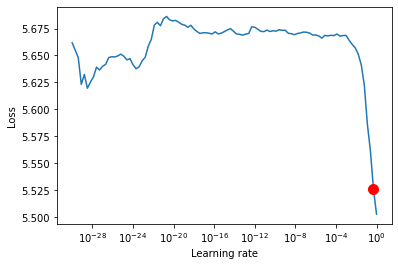

In [10]:
# tune
lr_finder = ocrTextDetector.tune()

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

In [11]:
ocrTextDetector.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch    29: reducing learning rate of group 0 to 2.0000e-03.


Epoch    35: reducing learning rate of group 0 to 2.0000e-04.


Epoch    41: reducing learning rate of group 0 to 2.0000e-05.


Epoch    47: reducing learning rate of group 0 to 2.0000e-06.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=22-step=9015-v1.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.07721823453903198}
--------------------------------------------------------------------------------


NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [12]:
ocrTextDetector.save(RESULT_MODEL_PATH)

model save to /var/www/nomeroff-net24/models/anpr_ocr_ge_2021_08_30_pytorch_lightning.ckpt


In [12]:
ocrTextDetector.load(RESULT_MODEL_PATH)

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [13]:
ocrTextDetector.test_acc(verbose=True)


[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/070240333897_0.png
Predicted: n57kx 			 True: nn575xx

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/WW504WO_0.png
Predicted: ww504k0 			 True: ww504w0

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/II672MI_1.png
Predicted: aa7995te 			 True: ii672mi

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/070140295957_0.png
Predicted: wu904a 			 True: wu906a

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/112734171320_0.png
Predicted: rb235ss 			 True: r735ss

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDete


[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/030636971076_0.png
Predicted: ga2049 			 True: gga2049

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/TBS854_0.png
Predicted: tbs584 			 True: tbs854

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/39409354-39409354_1_0.png
Predicted: t1472 			 True: gt1472

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/OO001AO_0.png
Predicted: dd001a0 			 True: 00001a0

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/070140322468_1.png
Predicted: br519rf 			 True: b519rf

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextD

0.9759770527070635

In [14]:
#ocrTextDetector.val_acc(verbose=False)
#ocrTextDetector.train_acc(verbose=False)

## than train with augumentation

In [8]:
class ge(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I",
                        "J", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

        
        # Train hyperparameters
        self.batch_size = 64
        self.epochs = 35
        self.gpus = 1

In [9]:
ocrTextDetector = ge()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True, num_workers=24)

GET ALPHABET
Max plate length in "val": 7
Max plate length in "train": 7
Max plate length in "test": 7
Letters train  {'4', 'U', 'Q', '0', 'H', '1', 'F', 'K', '2', 'V', 'J', 'I', 'M', '6', 'E', 'X', 'D', 'W', 'R', 'P', 'G', '7', 'Z', 'Y', 'A', '5', '9', '3', '8', 'N', 'T', 'L', 'C', 'S', 'B'}
Letters val  {'4', 'U', 'Q', '0', 'H', '1', 'F', 'K', '2', 'V', 'J', 'I', '6', 'M', 'E', 'X', 'D', 'W', 'R', 'P', 'G', '7', 'Z', 'Y', 'A', '5', '9', '3', '8', 'N', 'T', 'L', 'C', 'S', 'B'}
Letters test  {'4', 'U', 'Q', '0', 'H', '1', 'F', 'K', 'J', '2', 'V', 'I', '6', 'M', 'E', 'X', 'D', 'W', 'R', 'P', 'G', '7', 'Z', 'Y', 'A', '5', '9', '3', '8', 'N', 'T', 'L', 'C', 'S', 'B'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


In [12]:
#ocrTextDetector.load(RESULT_MODEL_PATH)
ocrTextDetector.load('/var/www/nomeroff-net24/models/anpr_ocr_ge_2021_08_30_pytorch_lightning.ckpt.5')

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.3 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 8


Found lr: 0.5011872336272719



GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Global seed set to 8


Epoch    23: reducing learning rate of group 0 to 2.0000e-03.


Epoch    33: reducing learning rate of group 0 to 2.0000e-04.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=26-step=10583-v1.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.06415875256061554}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/II672MI_1.png
Predicted: aa795te 			 True: ii672mi

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/070140295957_0.png
Predicted: wu100aa 			 True: wu906a

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/112734171320_0.png
Predicted: bb225ss 			 True: r735ss

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/37135583-37135583_3_0.png
Predicted: ks94fk 			 True: kf947fk

[INFO] /var/www/nomeroff-net


[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/SS501VV_0.png
Predicted: ss501iv 			 True: ss501vv

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/062140103812_0.png
Predicted: cc634ww 			 True: cc634wv

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/BBS602_1.png
Predicted: dz899zd 			 True: dz399zd

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/070340383593_0.png
Predicted: i111ka 			 True: ii111ka

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/062640222310_0.png
Predicted: uu282jk 			 True: uu282kk

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDe

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


Testing Accuracy:  0.9738257439942631
model save to /var/www/nomeroff-net24/models/anpr_ocr_ge_2021_08_30_pytorch_lightning.ckpt.8


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.3 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)
Global seed set to 8


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 9
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719


Global seed set to 9


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=33-step=13327-v1.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.06102776899933815}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/070240333897_0.png
Predicted: nn57xx 			 True: nn575xx

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/II672MI_1.png
Predicted: aa795te 			 True: ii672mi

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/070140295957_0.png
Predicted: wu90aa 			 True: wu906a

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/112734171320_0.png
Predicted: qcz235ss 			 True: r735ss

[INFO] /var/www/nomeroff-net24/Nome


[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/SS501VV_0.png
Predicted: se501iy 			 True: ss501vv

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/062140103812_0.png
Predicted: cc634ww 			 True: cc634wv

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/WT-274-TW_0.png
Predicted: wt274pw 			 True: wt274tw

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/BBS602_1.png
Predicted: dz399zu 			 True: dz399zd

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/063040289542_0.png
Predicted: hh693iw 			 True: hh693ih

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDete

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.3 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)


Testing Accuracy:  0.9720329867335963
model save to /var/www/nomeroff-net24/models/anpr_ocr_ge_2021_08_30_pytorch_lightning.ckpt.9


Global seed set to 9


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 10
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719


Global seed set to 10


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=30-step=12151-v2.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.06411600857973099}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/070240333897_0.png
Predicted: n575x 			 True: nn575xx

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/II672MI_1.png
Predicted: aa7995te 			 True: ii672mi

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/070140295957_0.png
Predicted: wu90a 			 True: wu906a

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/112734171320_0.png
Predicted: zb35s 			 True: r735ss

[INFO] /var/www/nomeroff-net24/Nomeroff


[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/GMB500_0.png
Predicted: tsb55 			 True: gmb500

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/070140308578_0.png
Predicted: ge9942 			 True: ge99942

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/WWO931_0.png
Predicted: wm0901 			 True: ww0931

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/070340375542_0.png
Predicted: id14dd 			 True: id144dd

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/SS501VV_0.png
Predicted: ss501vy 			 True: ss501vv

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/au

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.3 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)


Testing Accuracy:  0.9713158838293295
model save to /var/www/nomeroff-net24/models/anpr_ocr_ge_2021_08_30_pytorch_lightning.ckpt.10


Global seed set to 10


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 11
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719


Global seed set to 11


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=30-step=12151-v3.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.0661911591887474}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/070240333897_0.png
Predicted: nn574xx 			 True: nn575xx

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/DN-999-OM_0.png
Predicted: dn990m 			 True: dn9990m

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/MT-007-RO_0.png
Predicted: mt007p0 			 True: mt007r0

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/II672MI_1.png
Predicted: aa7995ts 			 True: ii672mi

[INFO] /var/www/nomeroff-net24/Nomeroff


[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/ZA050RN_0.png
Predicted: za050bn 			 True: za050rn

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/GVB444_0.png
Predicted: gvd444 			 True: gvb444

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/BB165ZZ_0.png
Predicted: bb155zz 			 True: bb165zz

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/JCJ835_0.png
Predicted: jcj35 			 True: jcj835

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/HH055HH_0.png
Predicted: bi5360ch 			 True: hh055hh

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNu


[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ge/autoriaNumberplateOcrGe-2019-07-06/test/img/070140324633_0.png
Predicted: vu989uu 			 True: vu989vd
Testing Accuracy:  0.9673718178558623
model save to /var/www/nomeroff-net24/models/anpr_ocr_ge_2021_08_30_pytorch_lightning.ckpt.11


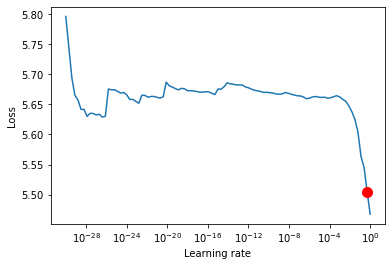

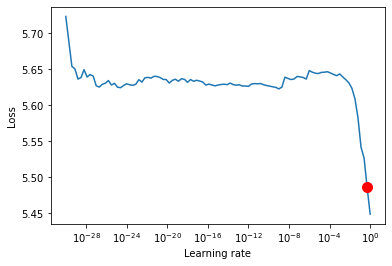

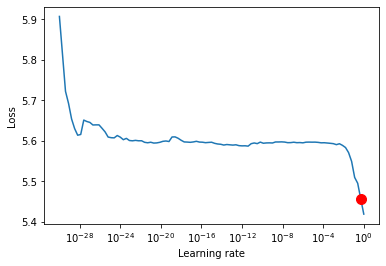

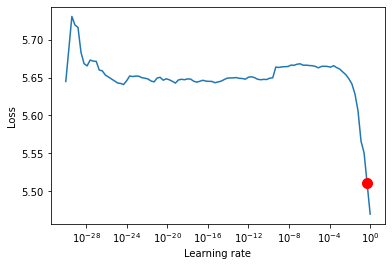

In [11]:
for i in range(8,12):
    # tune
    lr_finder = ocrTextDetector.tune()

    # Plot with
    fig = lr_finder.plot(suggest=True)
    fig.show()
    model = ocrTextDetector.train(seed=i)
    ocrTextDetector.test_acc(verbose=True)
    ocrTextDetector.save('{}.{}'.format(RESULT_MODEL_PATH,i))